In [504]:
import pandas as pd
import numpy as np
import operator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [526]:
data = pd.read_csv('Concrete_Data.csv')
minVals = data.min(0)
maxVals = data.max(0)
data = (data-minVals)/(maxVals-minVals)
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176,0.967485
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176,0.741996
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011,0.472655
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000,0.482372
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264,0.522860


线性回归模型：PE=θ0 + θ1∗CM + θ2∗BFS + θ3∗FA + θ4∗W + θ5*SP + θ6*CA + θ7*FA + θ8*AG

In [527]:
# Load data
col = data.shape[1]
X = np.matrix(data.iloc[:,:-1])
Y = np.matrix(data.iloc[:,-1])
theta = np.matrix(np.zeros(8))
print(X.shape)
print(Y.shape)

(1030, 8)
(1, 1030)


In [528]:
def CostFunction(X,Y,theta):
    inner = np.power((X*theta.T)-Y,2)
    return (np.sum(inner)/2*len(X))

In [529]:
CostFunction(X,Y,theta)

118735914.04274993

In [530]:
def gradientDescent(X,Y,theta,alpha,iters):
    parameters = int(theta.ravel().shape[1]) #特征值的数量，这里是8个
    temp = np.matrix(np.zeros(theta.shape))  #用来临时存放迭代的theta
    cost = np.zeros(iters)  #用于存放每次迭代过后的cost值
    for i in range(iters):
            error = (X*theta.T)-Y  #误差值

            for j in range(parameters):  #从theta0开始对参数梯度下降
                term = np.multiply(error,X[:,j])
                temp[0,j] = theta[0,j] - (alpha/len(X))*np.sum(term)
            #print(theta)
            theta = temp
            cost[i] = CostFunction(X,Y,theta)
    return theta,cost

In [531]:
theta, cost = gradientDescent(X,Y,theta,0.001,5000)
theta

matrix([[0.16740689, 0.16142097, 0.10321284, 0.23149265, 0.04857272,
         0.15030017, 0.20218821, 0.00700069]])

In [501]:
cost.min()

23787594.735014204

In [532]:
result = np.dot(X,theta.T)
result

matrix([[0.39204428],
        [0.39859807],
        [0.41087327],
        ...,
        [0.41149532],
        [0.40398394],
        [0.41815901]])

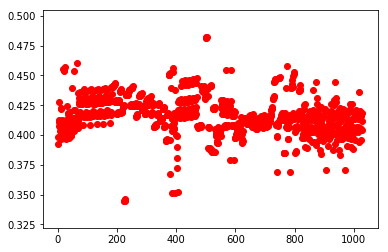

In [538]:
result = np.ravel(result.T)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(range(1030),result,color='red')
plt.show()

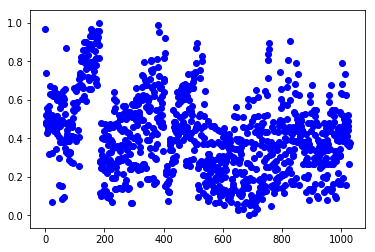

In [542]:
Y = np.ravel(Y.T)
fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.scatter(range(1030),Y,color='blue')
plt.show()

In [522]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

model = linear_model.LinearRegression()
model.fit(X,Y.T)

(1030, 8)
(1, 1030)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [523]:
print(model.score(X,Y.T))

0.6155198704142721


In [525]:
model.coef_

array([[ 0.65372242,  0.46504761,  0.2192059 , -0.23383314,  0.11722477,
         0.07750913,  0.10026005,  0.51796229]])